In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

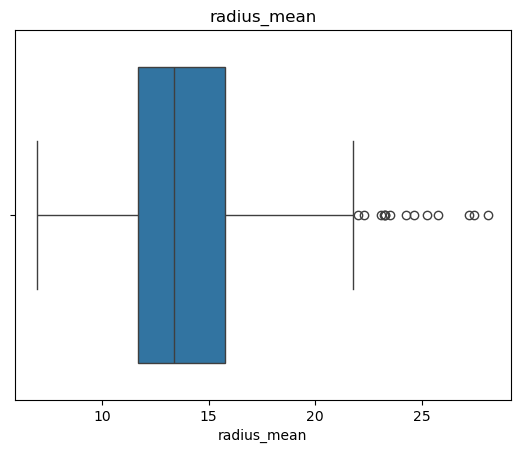

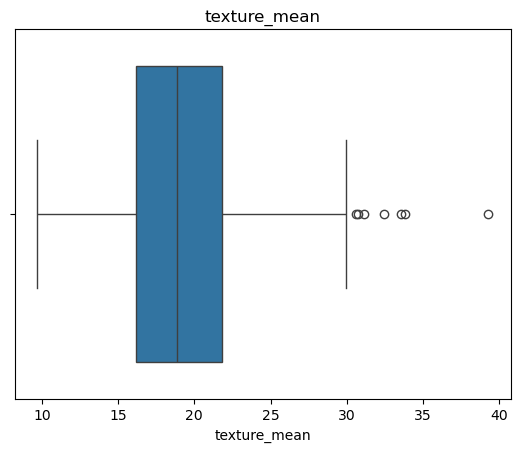

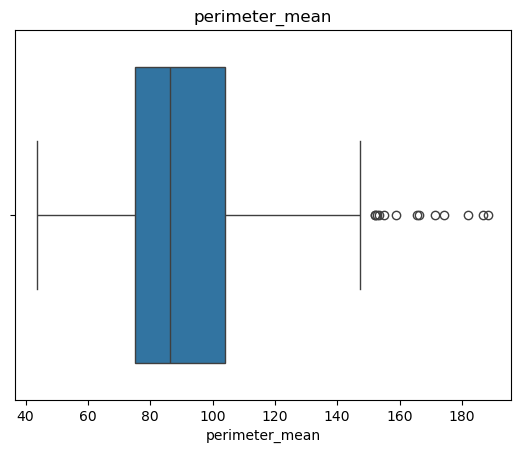

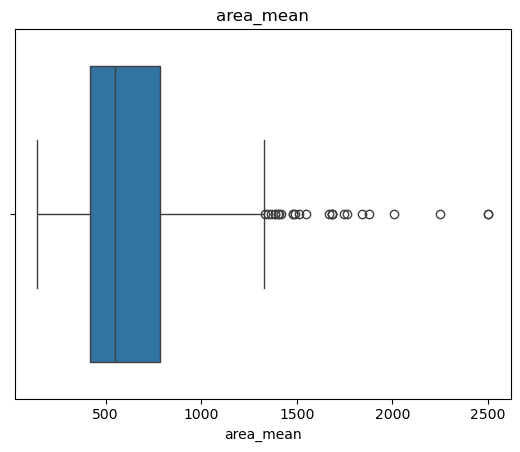

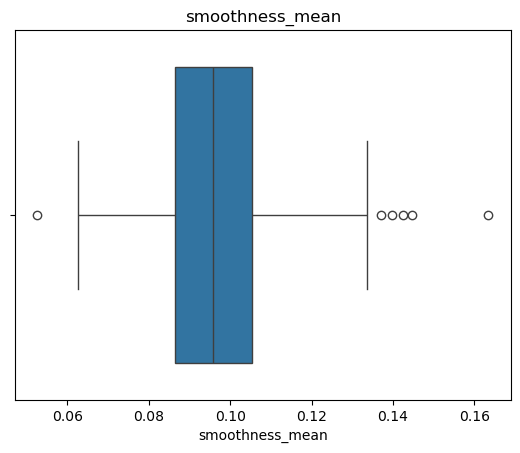

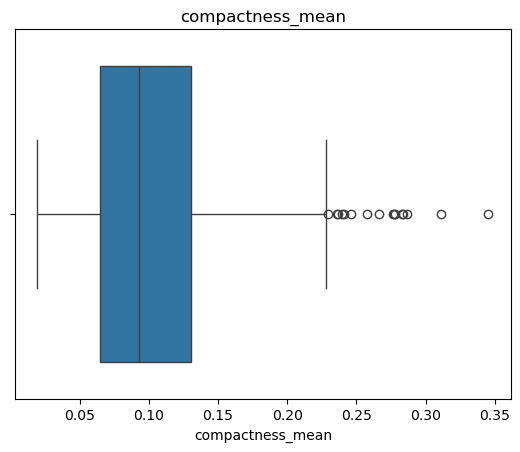

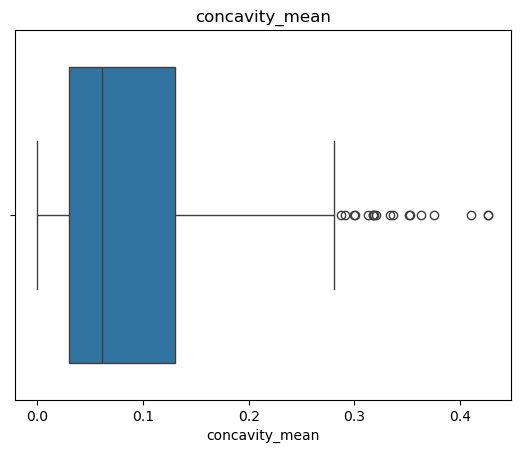

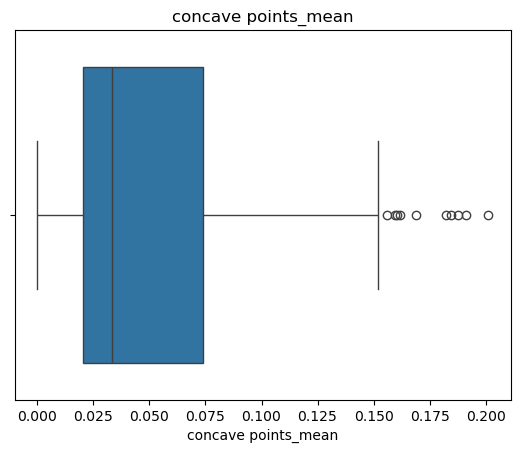

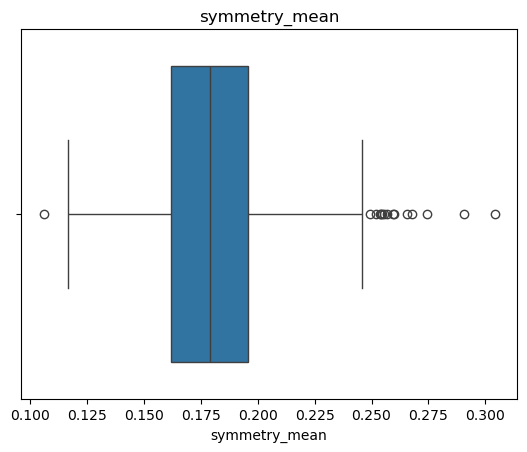

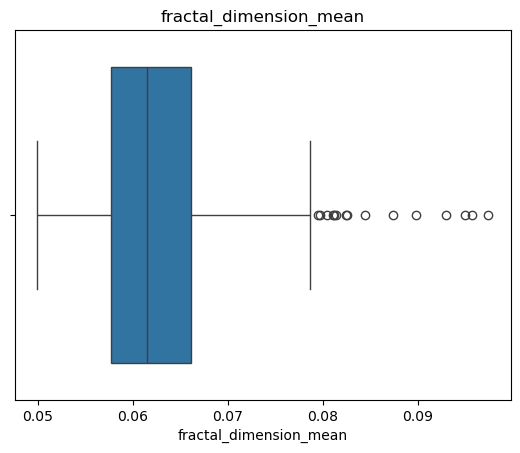

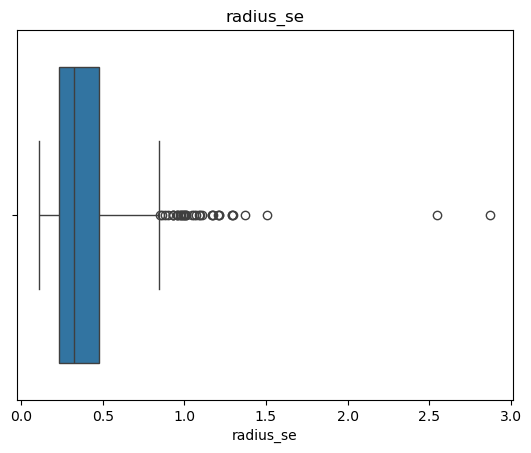

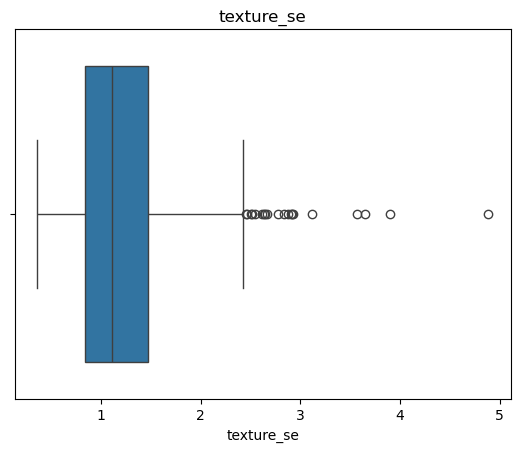

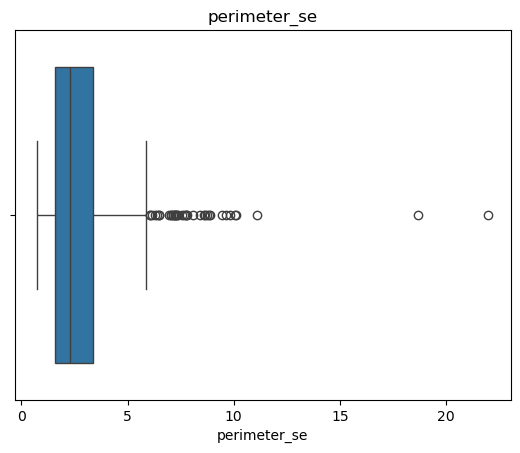

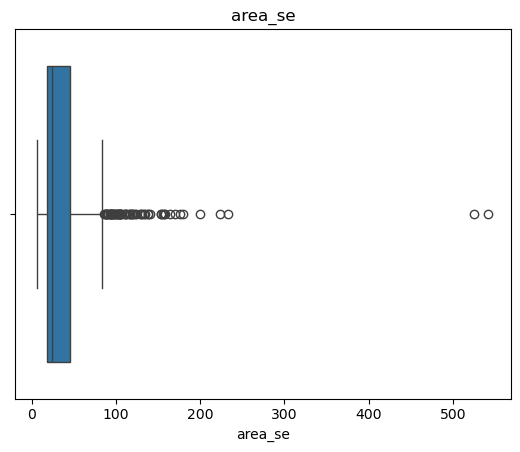

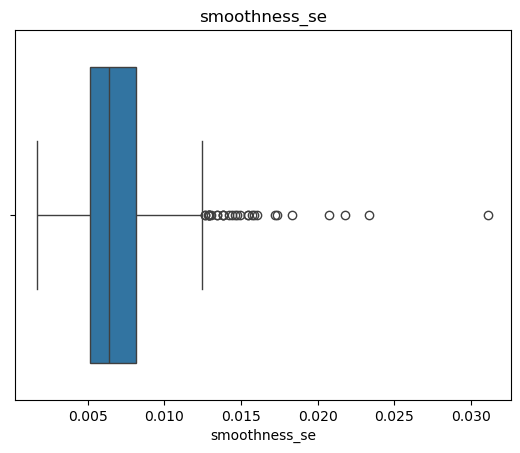

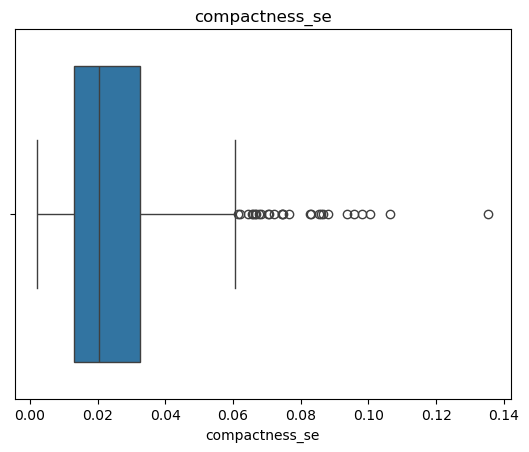

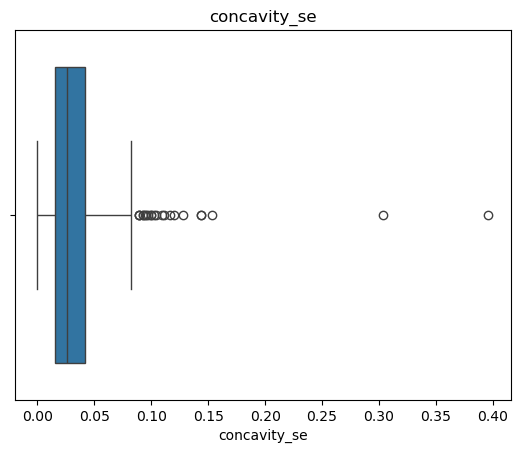

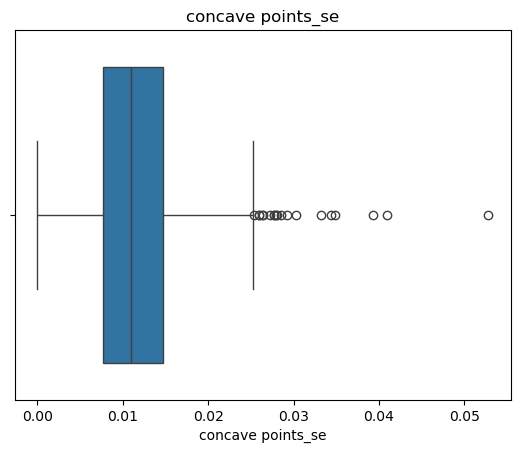

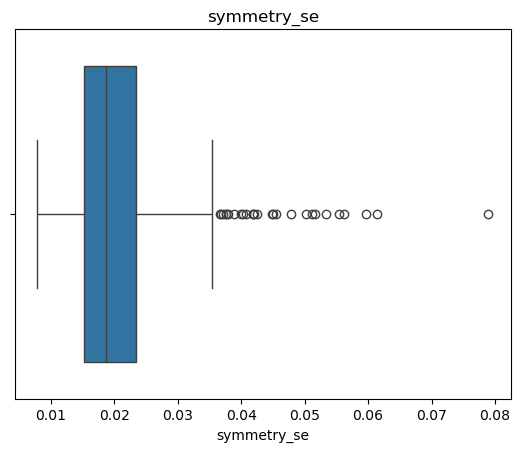

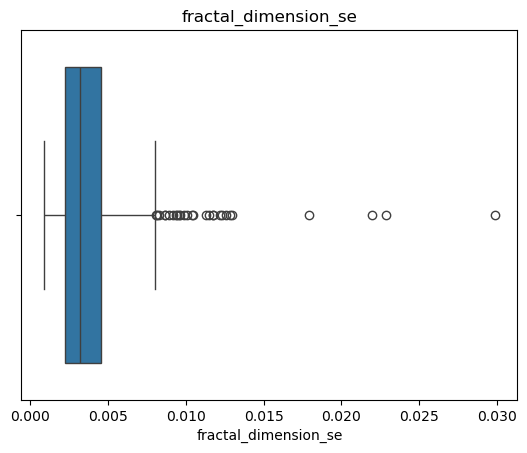

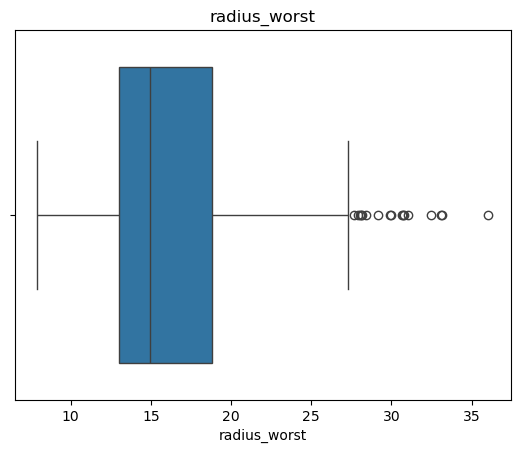

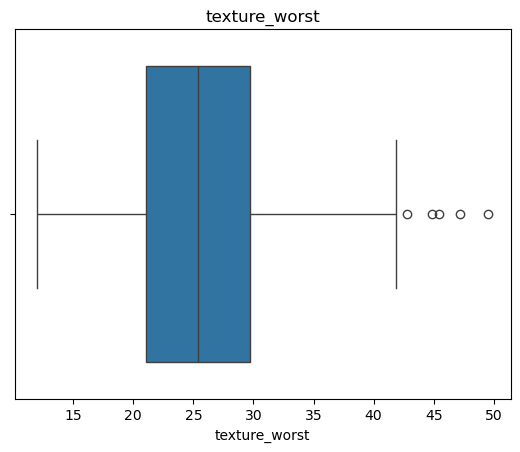

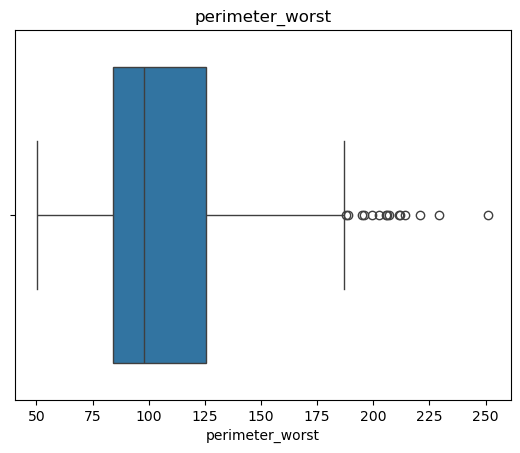

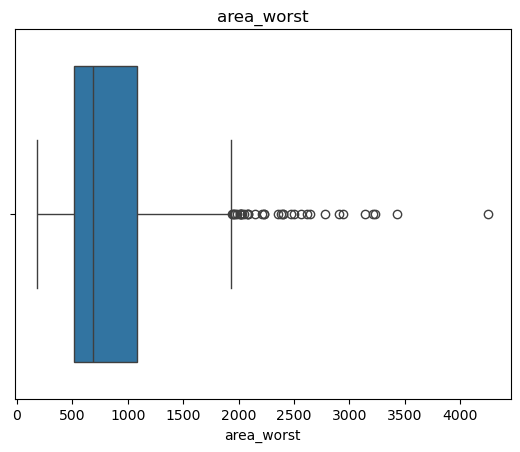

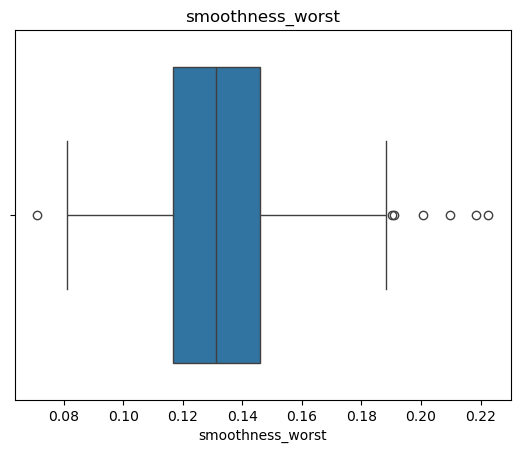

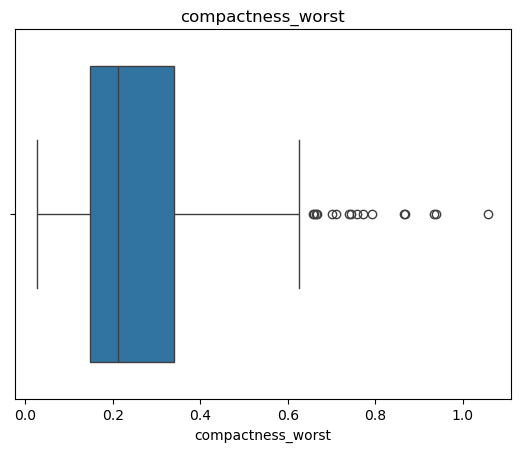

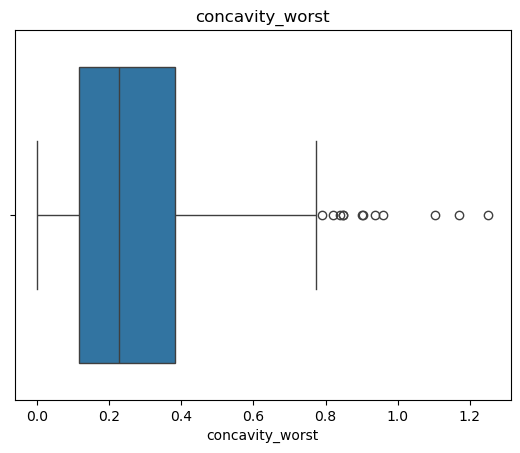

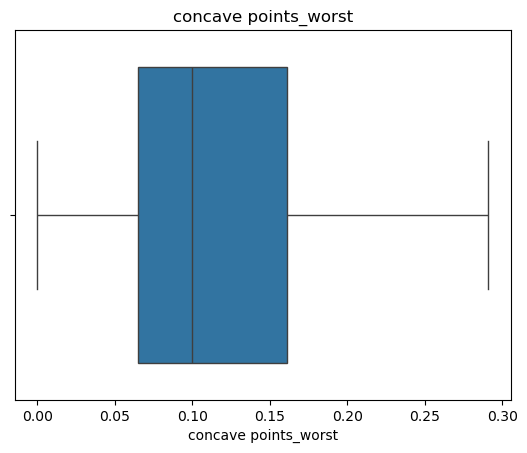

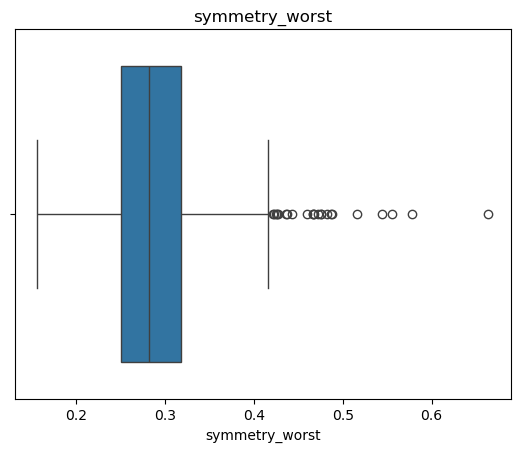

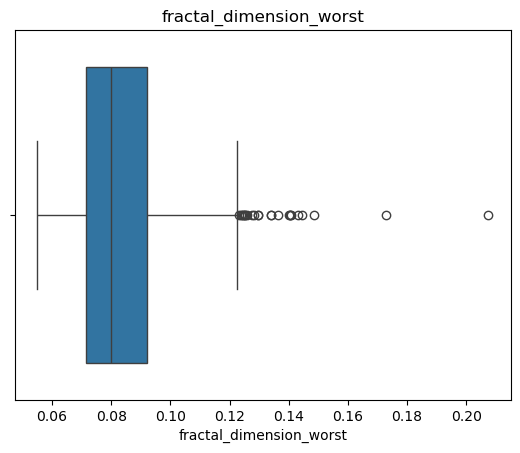

In [12]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [13]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df[col] >= lower) & (df[col] <= upper)]

In [14]:
# Select all numeric columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Loop through each numeric column
for col in num_cols:
    lower_cap = df[col].quantile(0.05)   # 5th percentile
    upper_cap = df[col].quantile(0.95)   # 95th percentile

    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])

print("Outliers capped successfully!")

Outliers capped successfully!


C:\Users\husna\AppData\Local\Temp\ipykernel_14384\2348270747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
C:\Users\husna\AppData\Local\Temp\ipykernel_14384\2348270747.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])
C:\Users\husna\AppData\Local\Temp\ipykernel_14384\2348270747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

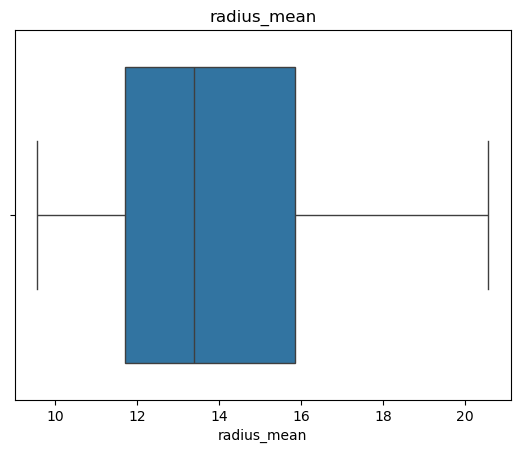

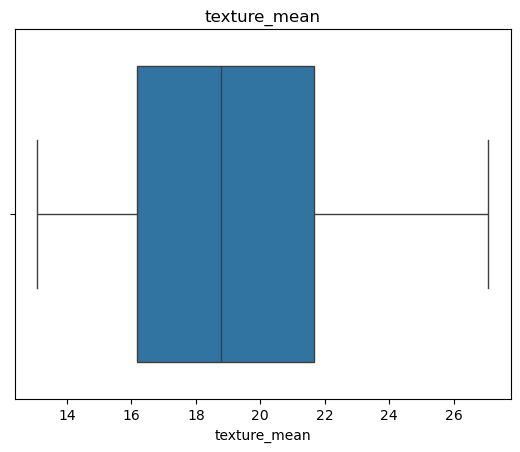

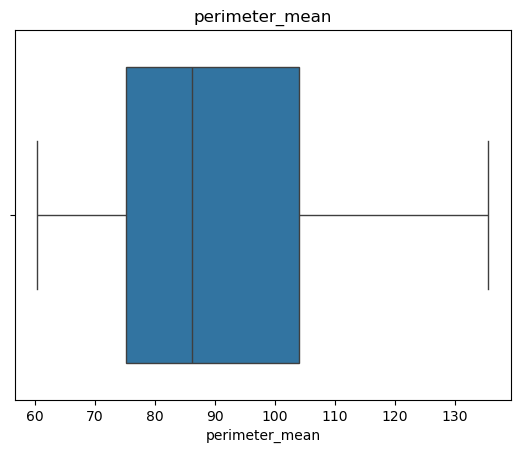

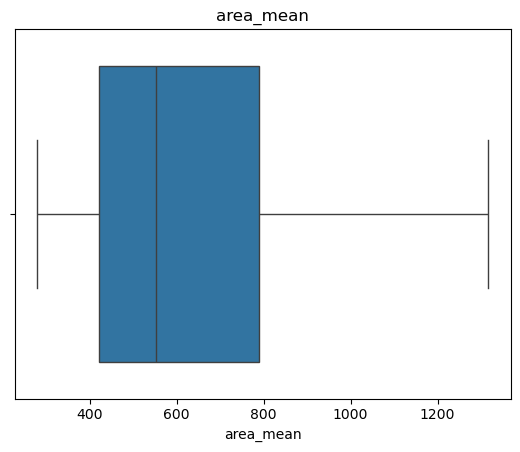

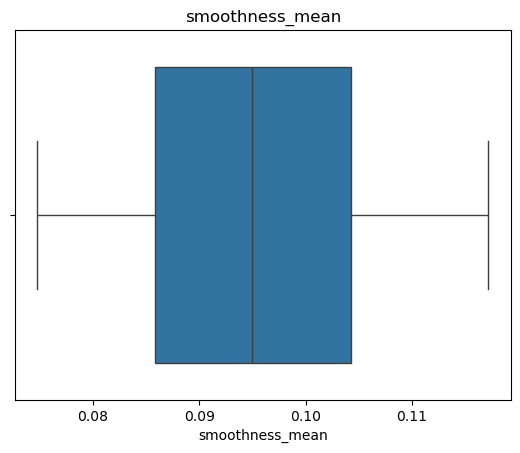

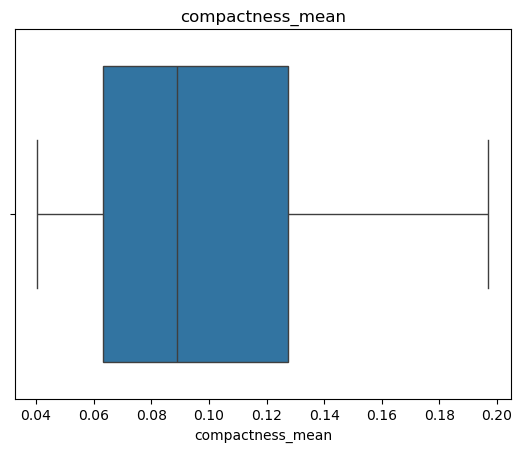

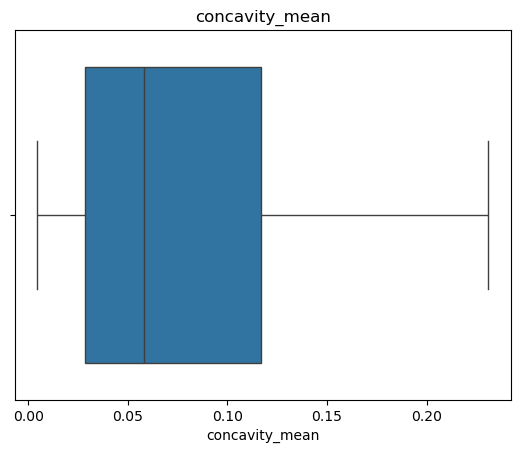

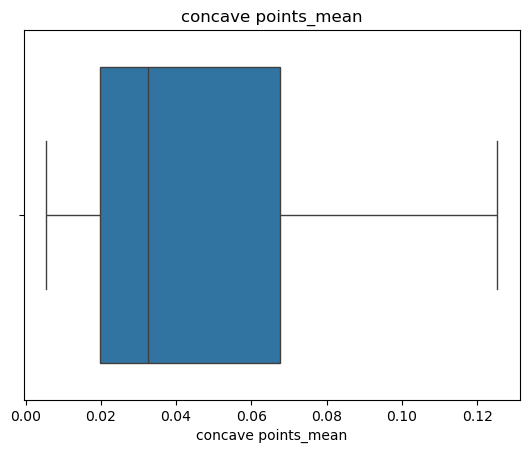

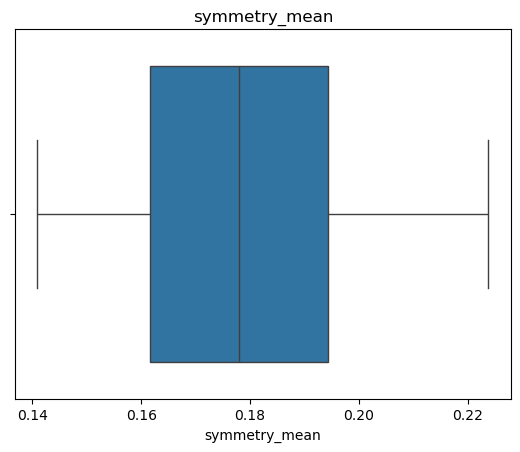

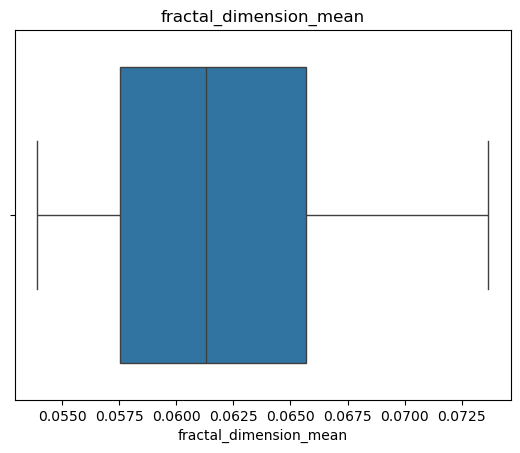

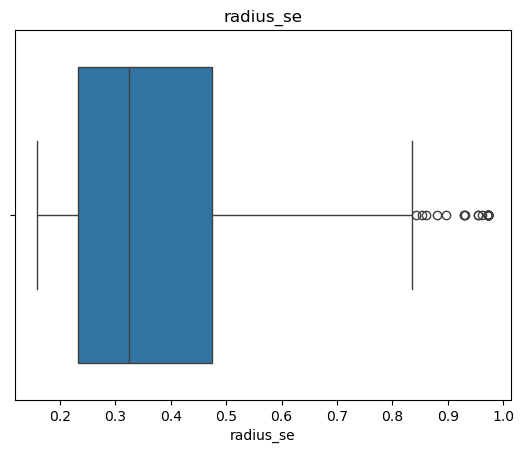

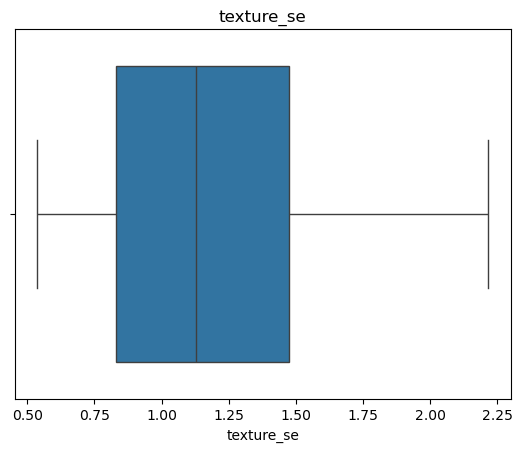

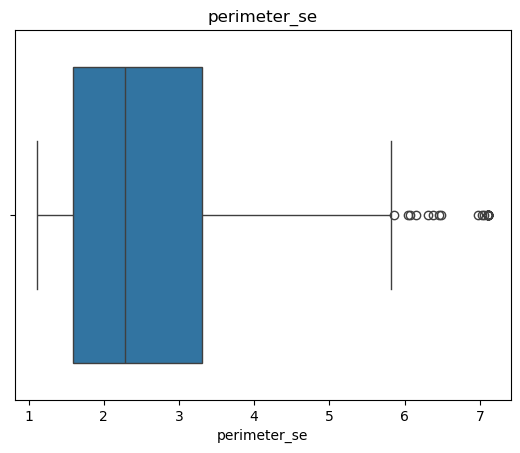

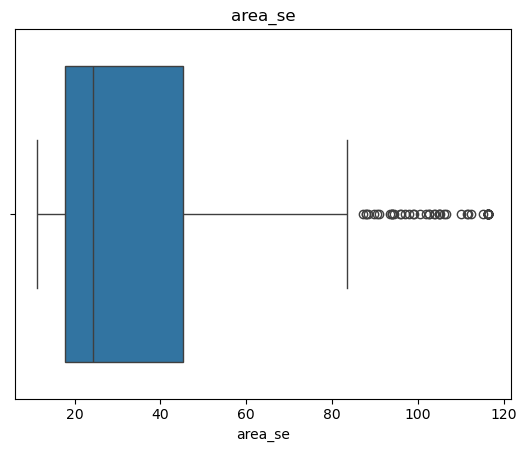

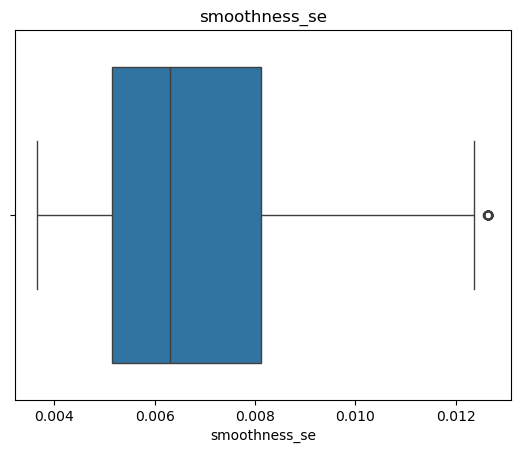

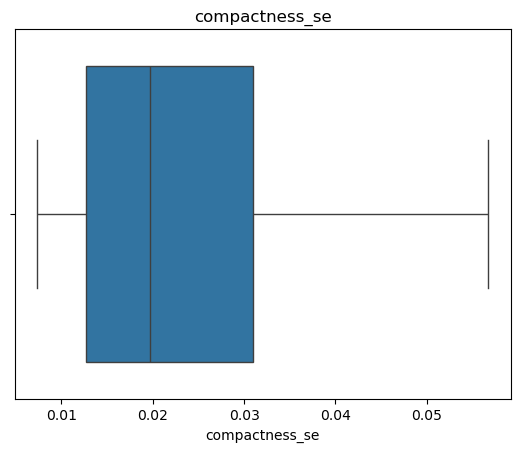

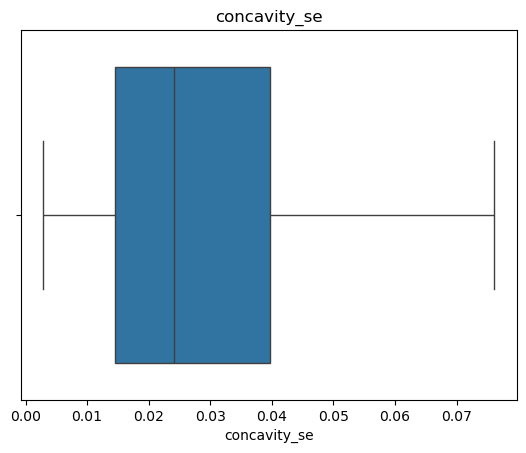

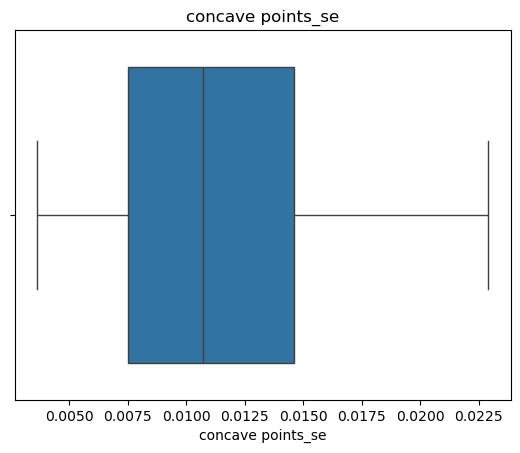

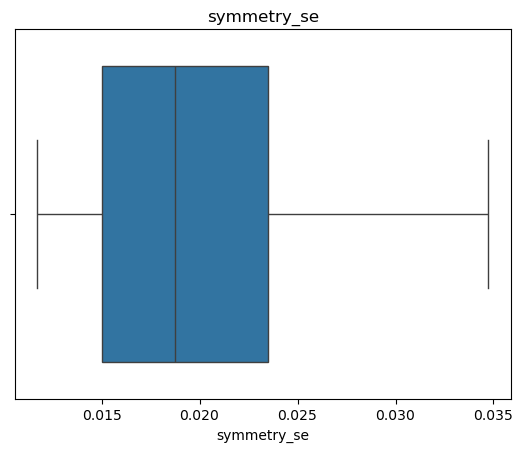

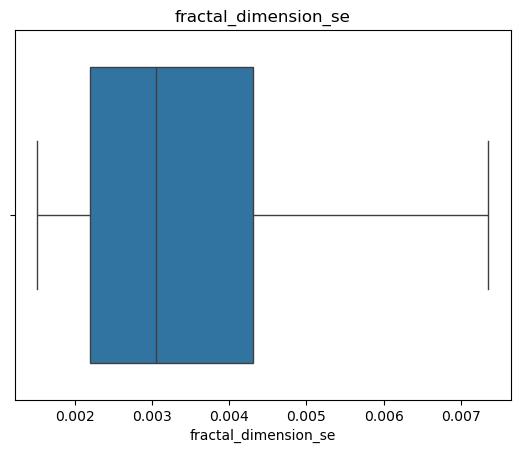

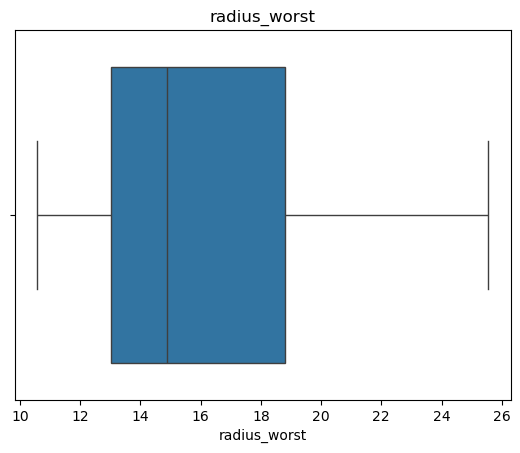

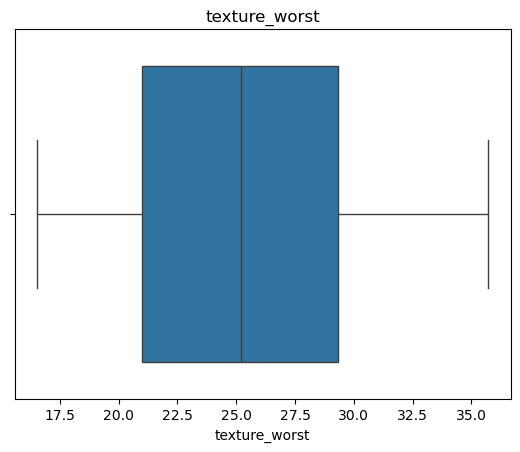

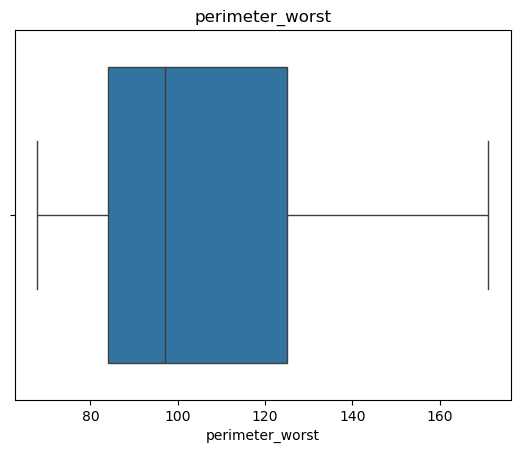

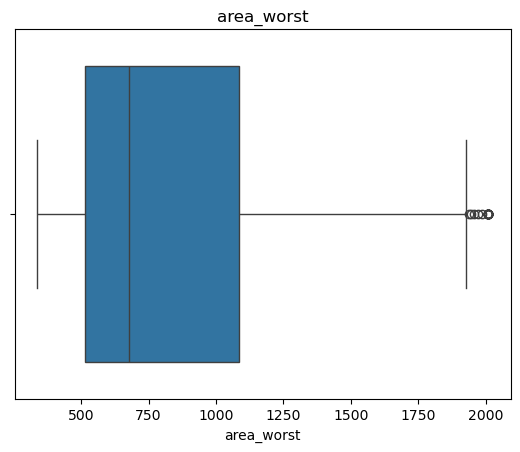

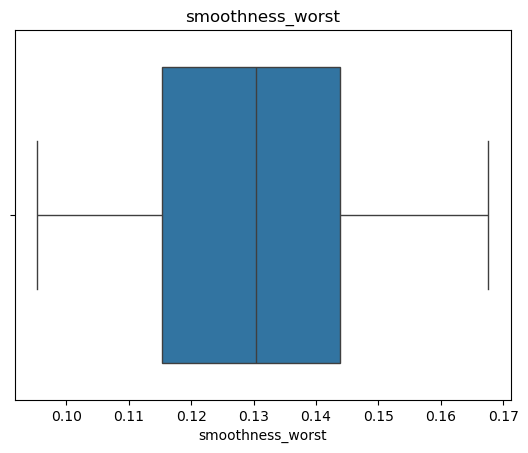

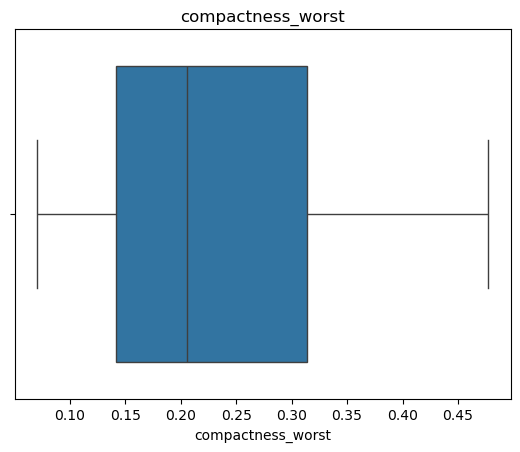

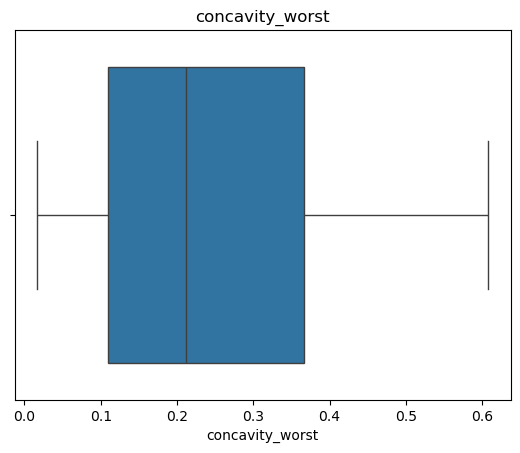

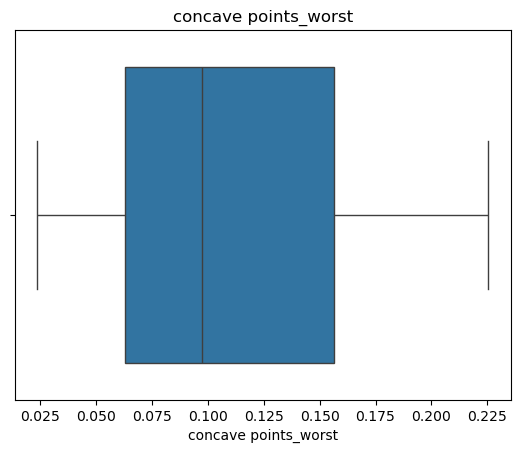

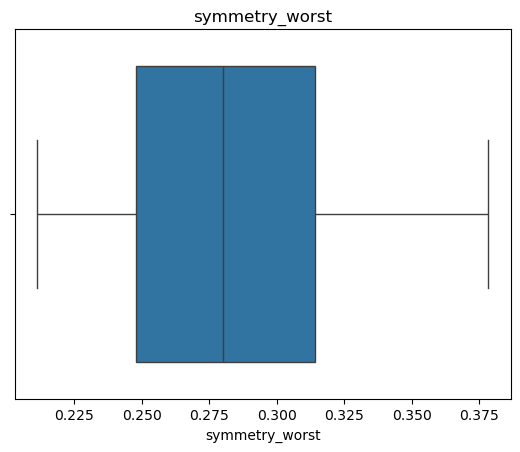

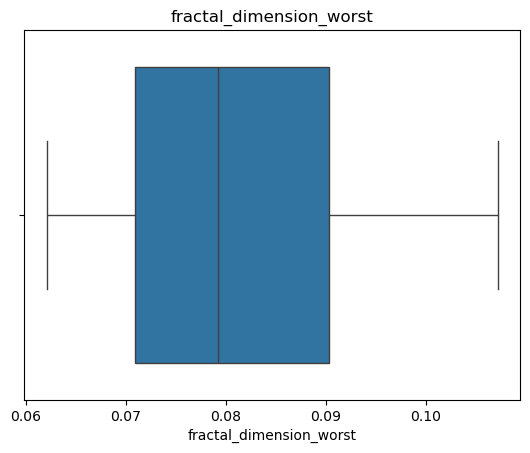

In [15]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [16]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

C:\Users\husna\AppData\Local\Temp\ipykernel_14384\3169430947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [17]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.9900,13.084,122.800,1001.00,0.117160,0.19698,0.230960,0.125280,0.22374,...,25.38,17.33,171.100,2009.8,0.162200,0.477300,0.60788,0.22544,0.37838,0.10718
1,1,20.5660,17.770,132.900,1316.80,0.084740,0.07864,0.086900,0.070170,0.18120,...,24.99,23.41,158.800,1956.0,0.123800,0.186600,0.24160,0.18600,0.27500,0.08902
2,1,19.6900,21.250,130.000,1203.00,0.109600,0.15990,0.197400,0.125280,0.20690,...,23.57,25.53,152.500,1709.0,0.144400,0.424500,0.45040,0.22544,0.36130,0.08758
4,1,20.2900,14.340,135.100,1297.00,0.100300,0.13280,0.198000,0.104300,0.18090,...,22.54,16.67,152.200,1575.0,0.137400,0.205000,0.40000,0.16250,0.23640,0.07678
6,1,18.2500,19.980,119.600,1040.00,0.094630,0.10900,0.112700,0.074000,0.17940,...,22.88,27.66,153.200,1606.0,0.144200,0.257600,0.37840,0.19320,0.30630,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.5660,25.090,135.580,1316.80,0.109900,0.19698,0.230960,0.125280,0.21490,...,24.29,29.41,171.100,1819.0,0.140700,0.418600,0.60788,0.22544,0.29290,0.09873
564,1,20.5660,22.390,135.580,1316.80,0.111000,0.11590,0.230960,0.125280,0.17260,...,25.45,26.40,166.100,2009.8,0.141000,0.211300,0.41070,0.22160,0.21138,0.07115
565,1,20.1300,27.076,131.200,1261.00,0.097800,0.10340,0.144000,0.097910,0.17520,...,23.69,35.72,155.000,1731.0,0.116600,0.192200,0.32150,0.16280,0.25720,0.06637
566,1,16.6000,27.076,108.300,858.10,0.084550,0.10230,0.092510,0.053020,0.15900,...,18.98,34.12,126.700,1124.0,0.113900,0.309400,0.34030,0.14180,0.22180,0.07820


In [18]:
x=df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [20]:
x_train.shape

(436, 30)

In [21]:
x_test.shape

(109, 30)

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [23]:
for k in ['linear','poly','rbf','sigmoid']:
    model=SVC(kernel=k)
    model.fit(x_train,y_train)
print(k,model.score(x_test,y_test))    

sigmoid 0.981651376146789


In [24]:
svm_sig = SVC(kernel='sigmoid', random_state=42)  # we'll tune C, gamma next
svm_sig.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid = GridSearchCV(
    SVC(kernel='sigmoid', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'C': 1, 'gamma': 'auto'}
Best CV score: 0.9747387669801462


In [26]:
best_params = grid.best_params_
final_svm = SVC(
    kernel='sigmoid',
    C=best_params['C'],
    gamma=best_params['gamma'],
    random_state=42
)
final_svm.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='sigmoid', random_state=42)

In [28]:
y_pred = final_svm.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.981651376146789

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.97      0.97      0.97        39

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109


Confusion Matrix:
 [[69  1]
 [ 1 38]]


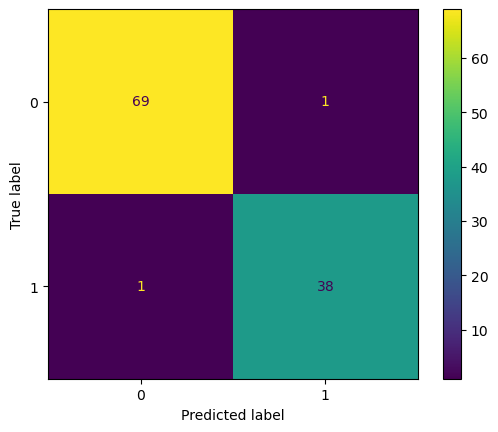

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

ROC-AUC: 0.9992673992673993


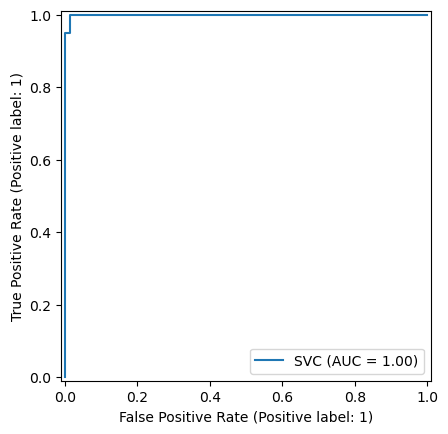

In [32]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = final_svm.decision_function(x_test)  # SVM uses decision_function

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(final_svm, x_test, y_test)
plt.show()


In [34]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
# Example new patient values (replace with your actual values)
new_data = np.array([[12.34, 14.22, 78.01, 456.0, 
                      0.095, 0.080, 0.046, 0.030, 0.160, 0.056, 
                      0.50, 1.20, 3.05, 40.0, 0.009, 
                      0.020, 0.030, 0.015, 0.020, 0.003,
                      15.1, 20.3, 98.4, 680.0, 0.12, 
                      0.13, 0.20, 0.10, 0.20, 0.06]])

# Scale the new data using the SAME scaler used for training
new_data_scaled = scalar.transform(new_data)

# Prediction
prediction = final_svm.predict(new_data_scaled)

# Interpret result
if prediction[0] == 0:
    print("🚨 Prediction: MALIGNANT (Cancer Positive)")
else:
    print("✅ Prediction: BENIGN (Non-cancerous)")
  
  


🚨 Prediction: MALIGNANT (Cancer Positive)


c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
